<div class="alert alert-block alert-danger">

__Комментарий от тимлида v1__
        
Привет!
    
Спасибо большое за первую версию исследования! Сейчас в работе имеются ошибки, которые я описал в комментариях к этапам работы. Ознакомься, пожалуйста. Буду ждать новой версии!
</div>


<div class="alert alert-block alert-danger">

__Комментарий от тимлида v2__
        
Привет!
    
Спасибо большое за внесенные исправления. В части предобработки стало сильно лучше, но сегментация еще сделана неправильно, потому что вместо клиентов ты выделила группы транзакций, а это не требуется бизнес-заказчику.
    
Ознакомься, пожалуйста, с комментариями. Буду ждать новой версии. Если что-то будет все равно не понятно, приходи ко мне в личные сообщения в Пачке.
</div>


<div class="alert alert-block alert-danger">

__Комментарий от тимлида v3__
        
Привет!
    
Ошибка в сегментации пока еще сохраняется. Обрати внимание на подсказку, которую я тебе дал в коде (ниже комментария в части сегментации).
</div>


<div class="alert alert-block alert-danger">

__Комментарий от тимлида v4__
        
Привет!
    
Спасибо за внесенные исправаления! Теперь методологических ошибок в работе я не вижу) Присылай новую версию работы с подготовленной презентацией, и будем переходить к дашборду.
</div>


<div class="alert alert-info">
<b> Комментарий студента v4</b>

Урра! Наконец-то получилось, спасибо!)

Дублирую сюда ссылочку на презентацию (еще она лежит в конце проекта в отдельном разделе).\
Вот. Держите. \
Ссылка: https://disk.yandex.ru/i/6Mml0eFd3iuotg

</div>

<div class="alert alert-block alert-success">

__Комментарий от тимлида v5__
        
Спасибо! Презентация также принимается. Поздравдялю со сдачей проекта. Теперь переходим к дашборду)
</div>


# Проект: Выявление профилей потребления

# Цель исследования:

Сформировать таргетированные предложения для каждого сегмента покупателей, что в будущем поможет повысить продажи в компании "Пока все еще тут"

# Описание проекта:

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наши ближайшие задачи — выявление профилей покупателей, а также полноценный анализ товарного ассортимента.
«Пока все ещё тут» — мы создаём уют!

# Описание данных:
Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».\
Колонки в ecommerce_dataset.csv :\
date — дата заказа;\
customer_id — идентификатор покупателя;\
order_id — идентификатор заказа;\
product — наименование товара;\
quantity — количество товара в заказе;\
price — цена товара.

# План работы:
Шаг 1: Загрузка данных и библиотек, необходимых для работы 

Шаг 2: Предобработка данных 
- приведение содержимого данных к нижнему регистру(для поиска дубликатов), 
- поиск и/или удаление дубликатов
- поиск и/или устранение пропусков, 
- проверка типов данных на соответствие фактической информации, содержащейся в стобцах с данными. Изменение типов данных(если будет необходимо) 
- Поиск аномальных значений и ошибок в данных, устранение.
На подготовленных данных приступаем к следующему шагу:

Шаг 3: Сегментация товаров на категории.
- Разбить весь товарный ассортимент на категории

Шаг 4: Исследовательский анализ данных.

- изучить более подробно метрики каждой категории (средний чек, общая сумма продаж, наиболее продаваемые товары, количество покупателей)
- Изучить зависимость ключевых метрик от месяца дня недели, времени года, времени суток по категориям. 

Шаг 5: Сегментация по профилю потребления

Шаг 6: Проверка статистических гипотез 
Проверить гипотезу о наличии  различий (или об их отсутствии) между различными кластерами по среднему чеку 

Выводы: 
- Сделать выводы на основании проведенного исследования
- Дать рекомендации по формированию таргетированных предложений для различных кластеров покупателей

Подготовить презентацию

Подготовить дашборд

## Загрузка данных

In [1]:
# Загрузим бибилиотеки:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from statistics import variance, pvariance

In [2]:
# Загрузим данные
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )
pd.set_option('display.max_rows', None)
df.head(5)

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0  
2                        Радермахера d-12 см h-20 см         1  112.0  
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0  
4                     Циперус Зумула d-12 см h-25 см         1  112.0

**Вывод:**

Все необходимые данные и библиотеки, которые необходимы для дальнейшей работы были успешно загружены. 

## Предобработка данных

Шаг 2: Предобработка данных 
- приведение содержимого данных к нижнему регистру(для поиска дубликатов), 
- поиск и/или удаление дубликатов
- поиск и/или устранение пропусков, 
- проверка типов данных на соответствие фактической информации, содержащейся в стобцах с данными. Изменение типов данных(если будет необходимо) 
- Поиск аномальных значений и ошибок в данных, устранение.
На подготовленных данных приступаем к следующему шагу:

In [3]:
# Приведем содержимое столбца ['product'] к нижнему регистру:
df['product'] = df['product'].str.lower()

Напишем функцию для обзора данных:

In [4]:
def df_review(df):
    print('ТАБЛИЦА С ДАННЫМИ:')
    display(df.head(10))
    print('INFO:----------')
    print(df.info())
    print('DESCRIBE:----------')
    print(df.describe())
    print('ПРОПУСКИ В ДАТАФРЕЙМЕ')
    print(df.isna().sum())
    print('ДУБЛИКАТЫ В ДАТАФРЕЙМЕ')
    print(df.duplicated().sum())
    
df_review(df)

ТАБЛИЦА С ДАННЫМИ:


date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7  2018100108  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8  2018100108  6644e5b4-9934-4863-9778-aaa125207701     68478   
9  2018100109  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                             product  quantity  price  
0    комнатное растение в горшке алое вера, d12, h30         1  142.0  
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0  
2                        радермахера d-12 см h-20 см         1  112.0  
3                   хризолидокарпус лутесценс d-9 см         1  179.0  
4                     циперус зумула d-12 см h-25 см         1  112.0  
5                            шеффлера лузеана d-9 см         1  164.0  
6                   юкка нитчатая d-12 см h-25-35 см         1  134.0  
7    настенная сушилка для белья gimi brio super 100         1  824.0  
8  таз пластмассовый 21,0 л круглый "водолей" с61...         1  269.0  
9  чехол для гладильной доски colombo persia beig...         1  674.0

INFO:----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
None
DESCRIBE:----------
               date       order_id     quantity         price
count  7.474000e+03    7474.000000  7474.000000   7474.000000
mean   2.018913e+09   49449.884265     2.362858    478.737501
std    4.278878e+05   32679.642404    14.500497    901.615895
min    2.018100e+09   12624.000000     1.000000      9.000000
25%    2.019022e+09   14833.000000     1.000000     97.000000
50%    2.019051e+09   68768.000000     1.000000    135.000000
75%    2.019063e+09

In [5]:
df.shape

(7474, 6)

В датафрейме содержится 6707 строк и 6 столбцов

Сразу же замечаем, что столбец ['date'] содержит данные типа int64. Необходимо изменить тип данных int64 -> datetime64.

In [6]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d%H")
df.head(5)
#df.info()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  
0    комнатное растение в горшке алое вера, d12, h30         1  142.0  
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0  
2                        радермахера d-12 см h-20 см         1  112.0  
3                   хризолидокарпус лутесценс d-9 см         1  179.0  
4                     циперус зумула d-12 см h-25 см         1  112.0

In [7]:
print('У нас имеются данные с (min):', (df['date'].min()), 'по (max):', (df['date'].max()))

У нас имеются данные с (min): 2018-10-01 00:00:00 по (max): 2020-01-31 15:00:00


In [8]:
orders = pd.pivot_table(df, index = ['date'], values = ['order_id'], aggfunc = 'nunique').reset_index()
orders

date  order_id
0    2018-10-01 00:00:00         1
1    2018-10-01 08:00:00         2
2    2018-10-01 09:00:00         1
3    2018-10-01 11:00:00         1
4    2018-10-01 12:00:00         1
5    2018-10-01 13:00:00         1
6    2018-10-01 15:00:00         1
7    2018-10-01 16:00:00         1
8    2018-10-01 18:00:00         1
9    2018-10-01 21:00:00         1
10   2018-10-02 08:00:00         1
11   2018-10-02 10:00:00         1
12   2018-10-02 11:00:00         3
13   2018-10-02 13:00:00         1
14   2018-10-02 14:00:00         2
15   2018-10-02 15:00:00         2
16   2018-10-02 17:00:00         1
17   2018-10-02 18:00:00         3
18   2018-10-02 19:00:00         1
19   2018-10-02 20:00:00         1
20   2018-10-02 21:00:00         1
21   2018-10-03 04:00:00         1
22   2018-10-03 08:00:00         1
23   2018-10-03 10:00:00         2
24   2018-10-03 11:00:00         1
25   2018-10-03 14:00:00         1
26   2018-10-03 15:00:00         1
27   2018-10-03 17:00:00         1
28   2018-10-04 00:00:00         1
29   2018-10-04 09:00:00         2
30   2018-10-04 10:00:00         1
31   2018-10-04 12:00:00         1
32   2018-10-04 13:00:00         2
33   2018-10-04 16:00:00         2
34   2018-10-04 17:00:00         2
35   2018-10-04 21:00:00         1
36   2018-10-05 00:00:00         1
37   2018-10-05 11:00:00         1
38   2018-10-05 12:00:00         1
39   2018-10-05 13:00:00         2
40   2018-10-05 17:00:00         1
41   2018-10-05 20:00:00         1
42   2018-10-06 00:00:00         1
43   2018-10-06 17:00:00         1
44   2018-10-07 00:00:00         1
45   2018-10-07 07:00:00         1
46   2018-10-07 12:00:00         1
47   2018-10-07 16:00:00         2
48   2018-10-07 17:00:00         1
49   2018-10-07 19:00:00         1
50   2018-10-07 20:00:00         1
51   2018-10-08 03:00:00         1
52   2018-10-08 07:00:00         1
53   2018-10-08 08:00:00         1
54   2018-10-08 09:00:00         1
55   2018-10-08 10:00:00         1
56   2018-10-08 11:00:00         1
57   2018-10-08 12:00:00         1
58   2018-10-08 13:00:00         2
59   2018-10-08 15:00:00         3
60   2018-10-08 16:00:00         1
61   2018-10-08 19:00:00         1
62   2018-10-08 20:00:00         1
63   2018-10-09 06:00:00         1
64   2018-10-09 07:00:00         1
65   2018-10-09 08:00:00         1
66   2018-10-09 09:00:00         2
67   2018-10-09 10:00:00         1
68   2018-10-09 11:00:00         2
69   2018-10-09 13:00:00         1
70   2018-10-09 15:00:00         2
71   2018-10-09 16:00:00         1
72   2018-10-09 17:00:00         1
73   2018-10-09 21:00:00         1
74   2018-10-10 08:00:00         1
75   2018-10-10 13:00:00         1
76   2018-10-10 14:00:00         2
77   2018-10-10 15:00:00         1
78   2018-10-10 19:00:00         1
79   2018-10-10 20:00:00         1
80   2018-10-10 21:00:00         1
81   2018-10-11 08:00:00         2
82   2018-10-11 09:00:00         1
83   2018-10-11 10:00:00         1
84   2018-10-11 11:00:00         1
85   2018-10-11 13:00:00         1
86   2018-10-11 14:00:00         2
87   2018-10-11 18:00:00         2
88   2018-10-12 10:00:00         2
89   2018-10-12 12:00:00         2
90   2018-10-12 13:00:00         1
91   2018-10-12 14:00:00         1
92   2018-10-12 15:00:00         1
93   2018-10-12 17:00:00         1
94   2018-10-12 21:00:00         1
95   2018-10-13 15:00:00         1
96   2018-10-13 16:00:00         2
97   2018-10-13 18:00:00         1
98   2018-10-13 19:00:00         1
99   2018-10-13 21:00:00         1
100  2018-10-14 05:00:00         1
101  2018-10-14 10:00:00         1
102  2018-10-14 15:00:00         1
103  2018-10-14 17:00:00         1
104  2018-10-14 18:00:00         1
105  2018-10-15 07:00:00         1
106  2018-10-15 09:00:00         1
107  2018-10-15 10:00:00         1
108  2018-10-15 11:00:00         1
109  2018-10-15 12:00:00         1
110  2018-10-15 15:00:00         1
111  2018-10-15 16:00:00         1
112  2018-10-15 17:00:00         2
113  2018-10-16 08:00:00      

In [9]:

fig = px.line(orders, x="date", y="order_id", title='Распределение заказов во времени')
fig.show()

<div class="alert alert-block alert-danger">

__Комментарий от тимлида v1__
        
Подсчет метрики количества заказов выполнен некорректно. Вместо того, чтобы считать заказы, ты сейчас считаешь транзакции. Исправь, пожалуйста.
</div>


<div class="alert alert-info">
<b> Комментарий студента</b>

Готово. Посчитала количество уникальных заказов на каждую дату.
</div>

<div class="alert alert-block alert-warning">

__Комментарий от тимлида v2__
        
Спасибо! Сейчас ты считаешь не на дату, а на конкретный час в дате, но тоже подойдет :)
</div>


In [10]:
# Посчитаем количество уникальных покупателей (customer_id):
print('Количество уникальных покупателей', len(df['customer_id'].unique()))

# Посчитаем количество уникальных товаров (product):
print('Количество уникальных товаров', len(df['product'].unique()))

# Посчитаем количество уникальных заказов (order_id):
print('Количество уникальных заказов', len(df['order_id'].unique()))


Количество уникальных покупателей 2451
Количество уникальных товаров 2341
Количество уникальных заказов 3521


### Аномалии в данных

Заметили, что максимальное число заказов товара - 1000 штук. Это похоже на оптовый заказ. Рассмотрим, много ли таких заказов, Проверим на наличие аномалий столбец ['quantity']:

In [11]:
print(np.percentile(df['quantity'], [90, 95, 96, 97, 98, 99]))

[ 2.  5.  7. 10. 14. 25.]


In [12]:
delete_orders = df.loc[df['quantity'] > 50]
delete_orders

date                           customer_id  order_id  \
13   2018-10-01 15:00:00  0948b0c2-990b-4a11-b835-69ac4714b21d     68486   
160  2018-10-09 09:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b     68580   
211  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
212  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
266  2018-10-16 08:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
267  2018-10-16 08:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
568  2018-11-01 08:00:00  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
586  2018-11-02 11:00:00  0c5aaa88-e346-4f87-8f7a-ad8cbc04e965     68831   
1023 2018-11-29 17:00:00  8fba3604-ef57-4b9f-b2fe-3402fa8825c8     69156   
1103 2018-12-04 17:00:00  7d255526-fcc2-4f79-b28a-217d7d2373a8     69206   
1158 2018-12-10 14:00:00  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
1299 2018-12-21 16:00:00  6987e6d6-a63a-4ce2-a2d0-f424092d235e     69504   
1555 2019-01-21 09:00:00  8eabcaca-e8c8-4eee-9079-4ff5f612273a     69893   
2431 2019-03-23 10:00:00  685d3d84-aebb-485b-8e59-344b3df8b3d3     70841   
2598 2019-04-02 09:00:00  aaafc0ca-1fd4-4d0b-b7b8-37391c319fd3     70970   
2969 2019-04-19 18:00:00  498f12a4-6a62-4725-8516-cf5dc9ab8a3a     71204   
3961 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
4082 2019-05-28 13:00:00  f9d19e1d-9414-485b-9d8d-02bc196a88e8     71539   
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
5456 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
6367 2019-09-19 16:00:00  de95510f-3558-4c42-97dc-98cc4215c278     72698   
6478 2019-09-30 16:00:00  0af078d6-facf-4ece-ad7b-3b4446ec19a2     72811   
6535 2019-10-07 11:00:00  d933280e-5372-448f-be44-b269c8bafc2a     72885   
6567 2019-10-10 14:00:00  bd5328dc-1e15-4757-9fe2-f56e4f8eaa7c     72920   
6707 2019-10-28 10:00:00  018fb729-3525-4314-8e4d-1982b1062f9f     73110   

                                                product  quantity  price  
13    крючок одежный 2-х рожковый серый металлик с п...        96   38.0  
160         стяжка оконная с болтом ст-55 цинк, 1108354        64   19.0  
211                 крепеж для пружины дверной, 1107055       150   19.0  
212   пружина дверная 240 мм оцинкованная (д-19 мм) ...       150   38.0  
266                 крепеж для пружины дверной, 1107055       150   19.0  
267   пружина дверная 240 мм оцинкованная (д-19 мм) ...       150   38.0  
568                           муляж яблоко 9 см красное       170   51.0  
586                           муляж яблоко 9 см красное       140   59.0  
1023      набор ножей attribute chef 5 предметов akf522        64  457.0  
1103        щетка для посуды *оля*, мультипласт 1807010       100   26.0  
1158      ручка-скоба рс-100 белая *трибатрон*, 1108035       200   29.0  
1299  тележка багажная delta тбр-22 синий грузоподъе...        57  574.0  
1555       щетка для мытья посуды колибри м5202 большая       100   34.0  
2431  плечики пластмассовые размер 52 - 54 тула 1205158       150   20.0  
2598  ковш пластмассовый полимербыт с215, 1,5 л 1406006        59   64.0  
2969  салфетка protec textil polyline 30х43 см амети...        60  191.0  
3961                          муляж яблоко 9 см красное       300   51.0  
4082  насадка на валик вмм-200/60 белый искусственны...        70   22.0  
5071   вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0  
5456  вантуз с деревянной ручкой d14 см красный, bur...      1000  675.0  
6367  универсальный нож webber из нержавеющей стали ...        80   45.0  
6478     кружка с трубочкой attribute мяч 500 мл jar501        60   76.0  
6535   крепеж для пружины дверной оцинкованный, 1107054       100   19.0  
6567  искусственный цветок подснежник садовый пласти...        65   32.0  
6707          шпингалет 80 мм белый с пружиной, 1102188       100   44.0

In [13]:
df = df.drop(df[df['order_id'].isin(delete_orders['order_id'])].index)

In [14]:
#Удалим заказы клиентов с аномальной активностью:
df = df[df.customer_id != 'c971fb21-d54c-4134-938f-16b62ee86d3b']
df = df[df.customer_id != '4d93d3f6-8b24-403b-a74b-f5173e40d7db']

Оставим только те строки с товарами, количество проданых единоразово меньше 50 шт. Так мы потеряем меньше 1% данных. Это вполне допустимый объем потерь при предобработке данных. Теперь наш датафрейм гораздо лучше подготовлен для анализа розничных продаж магазина.

<div class="alert alert-block alert-danger">

__Комментарий от тимлида v1__
        
Как я уже говорил вам на консультации (также указывал это в материалах), удалять отдельные транзакции в исследовании не очень корректно, потому что это может привести к смещению статистик по заказам клиентов. Лучше вместо отдельных транзакций удалять заказы полностью.

</div>


<div class="alert alert-info">
<b> Комментарий студента v1</b>

Заказы с аномальными значениями были удалены
</div>

<div class="alert alert-block alert-success">

__Комментарий от тимлида v2__
        
Спасибо, принимается
</div>


Замечаем следующий интересный факт: начиная с 1 ноября 2019 года и вплоть до 31 января 2020 года, число транзакций ежедневно не превышает одного - двух. Будем считать эти данные аномальными, и не будем использовать их для дальнейшего анализа.

Еще раз посмотрим на график.

In [15]:
df = df['2019-11-01 00:00'>= df['date']]
print('У нас имеются данные с (min):', (df['date'].min()), 'по (max):', (df['date'].max()))

У нас имеются данные с (min): 2018-10-01 00:00:00 по (max): 2019-10-31 23:00:00


In [16]:
suma = df.groupby('order_id').agg({'date':'nunique'}).sort_values(by = 'date', ascending = False).query('date > 1')
len(suma)
print('Количество уникальных заказов:', (df['date'].min()), 'по (max):', (df['date'].max()))

Количество уникальных заказов: 2018-10-01 00:00:00 по (max): 2019-10-31 23:00:00


In [17]:
fig = px.line(orders, x="date", y="order_id", title='Распределение заказов во времени')
fig.show()

<div class="alert alert-block alert-danger">

__Комментарий от тимлида v1__
        
Подсчет метрики количества заказов выполнен некорректно. Вместо того, чтобы считать заказы, ты сейчас считаешь транзакции. Исправь, пожалуйста. Поле quantity не подходит для подсчета количества заказов. Вместо этого нужно использовать поле order_id с правильной агрегирующей функцией.
</div>


<div class="alert alert-info">
<b> Комментарий студента v1</b>

Заказы посчитаны
</div>

<div class="alert alert-block alert-success">

__Комментарий от тимлида v2__
        
Спасибо, принимается
</div>


In [18]:
#df.sort_values(by = 'price').head(10)
df.sort_values(by = 'price').tail(10)

date                           customer_id  order_id  \
6169 2019-08-23 12:00:00  8d85f320-5f55-4647-814c-da1a6b21c2a4     72381   
1241 2018-12-17 17:00:00  86c97bf1-c834-423e-9e38-8acda68f97e8     69417   
654  2018-11-05 22:00:00  fc333417-1d11-4a2a-b946-0957ae0603e9     68872   
5994 2019-07-30 01:00:00  e2fe6b48-1955-4882-925c-733f545df026     72140   
2339 2019-03-14 18:00:00  27d4ce42-352b-4756-bf5b-8724e05d5131     70740   
6629 2019-10-16 15:00:00  d5584388-ffbe-42fd-a746-a98828ec919f     72992   
2997 2019-04-21 16:00:00  19d904d8-8d16-476d-8f66-b2a3b7a23660     71227   
1981 2019-02-24 10:00:00  ac250053-a236-467a-97d2-ddbb9bf4a1ba     70423   
2697 2019-04-05 19:00:00  c0c60544-3a99-49d0-8a8e-cf7f293c22cb     71035   
5992 2019-07-29 17:00:00  0d87f4ae-465a-4fac-81e6-5d629761783e     72139   

                                                product  quantity    price  
6169  урна уличная стальная сальвадор 02.021.0 46х11...         1   7349.0  
1241  гладильная доска leifheit airboard compact m p...         1   7424.0  
654   сумка-тележка хозяйственная rolser mou041 malv...         1   7597.0  
5994  сумка-тележка хозяйственная rolser mnb017 fucs...         1   7679.0  
2339  сумка-тележка хозяйственная rolser imx006 bass...         1   7679.0  
6629  стремянка 7 ступенчатая hailo 8040-707 xxl 13 ...         1   7724.0  
2997  сумка-тележка хозяйственная rolser mnb019 rojo...         1   8077.0  
1981  сумка-тележка хозяйственная andersen alu star ...         1   8437.0  
2697  сумка-тележка хозяйственная andersen royal sho...         1   8737.0  
5992  сушилка уличная leifheit 85210 linomatic v 400...         1  14917.0

Проверили цены на наличие аномалий. Меньше всего стоят семена(от 9 рублей). Дороже всего стоят сумки-тележки, стремянка, сушилка. Будем считать, что цены адекватные и аномалий здесь нет.

<div class="alert alert-block alert-danger">

__Комментарий от тимлида v1__
        
В рамках исследования также будет полезным посмотреть и на неявные дубликаты внутри данных. В реальной работе всегда следует относиться к полученным данным критически, чтобы снизить риски получения искаженных результатов из-за имеющихся ошибок.
    
Можно изучить следующие моменты:
* Соответствуют ли у тебя данные правилу "1 клиент = 1 заказ". В реальной жизни не должно случаться такого, чтобы 1 заказ соответствовал сразу нескольким клиентам, но в данных может быть все что угодно...
    
* Соответствуют ли у тебя данные правилу "1 заказ = 1 дата". В реальной жизни не должно случаться такого, чтобы 1 заказ соответствовал сразу нескольким датам, но в данных может быть все что угодно...
</div>

<div class="alert alert-block alert-success">

__Комментарий от тимлида v2__
        
Спасибо, принимается
</div>


### Работа с неявными дубликатами

Полных дубликатов в датасете мы не обнаружили. Совершим поиск и удаление неявных дубликатов.

In [19]:
# Посмотрим на неявные дубликаты
df[df.duplicated(['product', 'customer_id', 'order_id', 'price'])]
# И посчитаем их количество:
duplcates = len(df[df.duplicated(['product', 'customer_id', 'order_id', 'price'])])
duplcates

1879

In [20]:
print('Доля дубликатов от общего количества записей: {:.2%}'.format(duplcates / len(df))) 


Доля дубликатов от общего количества записей: 28.81%


Оказалось, что в датасете довольно много неявных дубликатов. Такое могло произойти при некорректной выгрузке данных. Такие дубликаты негативно сказываются на качестве анализа данных. Принимаем решение избавиться от них:

In [21]:
df = df.drop_duplicates(['product', 'customer_id', 'order_id', 'price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4643 entries, 0 to 6741
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4643 non-null   datetime64[ns]
 1   customer_id  4643 non-null   object        
 2   order_id     4643 non-null   int64         
 3   product      4643 non-null   object        
 4   quantity     4643 non-null   int64         
 5   price        4643 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 253.9+ KB


<div class="alert alert-info">
<b> Комментарий студента</b>

Поиск неявных дубликатов выполнен. Дубликаты были удалены.
</div>

Мы уже убедились, что в данных достаточно много ошибок, поэтому проверим данные на соответствие правилу  "1 клиент = 1 заказ":

In [22]:
#Выведем число заказов от нескольких пользователей:
orders_with_many_customers = df.groupby('order_id').agg({'customer_id':'nunique'}).query('customer_id > 1')
len(orders_with_many_customers)                                                                

29

Принимаем решение удалить несоответствующие данные:

In [23]:
df = df.query('order_id not in @orders_with_many_customers.index')

Аналогичным образом проверим данные на соответствие правилу   "1 заказ = 1 дата":

In [24]:
orders_with_many_dates = df.groupby('order_id').agg({'date':'nunique'}).query('date > 1').sort_values(by='date', ascending=False)
orders_with_many_dates
#len(orders_with_many_dates)                                                                

date
order_id      
14500        2
14649        2
14898        2
69527        2
69750        2
69807        2
69861        2
70031        2
70186        2
70318        2
70995        2
71143        2
71426        2
72517        2

In [25]:
#Удаляем:
df = df.query('order_id not in @orders_with_many_dates.index')

In [26]:
#Проверяем:
df.groupby('order_id').agg({'date':'nunique'}).query('date > 1').sort_values(by='date', ascending=False)

Empty DataFrame
Columns: [date]
Index: []

Посмотрим на окончательную информацию о датасете, прежде чем приступить к дальнейшей работе: 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4523 entries, 0 to 6741
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4523 non-null   datetime64[ns]
 1   customer_id  4523 non-null   object        
 2   order_id     4523 non-null   int64         
 3   product      4523 non-null   object        
 4   quantity     4523 non-null   int64         
 5   price        4523 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 247.4+ KB


<div class="alert alert-info">
<b> Комментарий студента v1</b>

Проведена проверка соответствия правилу 1 клиент = 1 заказ и 1 заказ = 1 дата.
Несоответствующие правилу строки были удалены.
</div>

<div class="alert alert-block alert-success">

__Комментарий от тимлида v2__
        
Спасибо, принимается
</div>


### Выводы: 
- В датафрейме пропуски не были обнаружены. 
- Полные дубликаты обнаружены не были. Неполные дубликаты были удвлены.
- Столбец ['date'] был приведен к типу datetime64.
- Были устранены аномалии по числу проданых товаров.
- Проведена проверка соответствия правилу 1 клиент = 1 заказ и 1 заказ = 1 дата. Несоответствующие правилу строки были удалены.
- Данные готовы для последующей работы.

## Категоризация товаров

Разобьем весь товарный ассортимент на 5 категорий:
-  "Сад"
- "Уборка"
- "Дом"
- "Кухня"
- "Муляжи"

In [28]:
print('Всего уникальных товарных наименований содержится в датасете', len(df['product'].unique()))

Всего уникальных товарных наименований содержится в датасете 2228


In [29]:
#Ограничим наименование первыми двумя словами, выведем их в отдельный столбец:
df['new_product'] =  df['product'].str.split(' ').str[:2].str.join(' ')

In [30]:
#Выглядит это вот так:
df.head(5)

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

                 new_product  
0         комнатное растение  
1         комнатное растение  
2           радермахера d-12  
3  хризолидокарпус лутесценс  
4             циперус зумула

In [31]:
new_product = df['new_product']
print(new_product)

0                      комнатное растение
1                      комнатное растение
2                        радермахера d-12
3               хризолидокарпус лутесценс
4                          циперус зумула
5                        шеффлера лузеана
6                           юкка нитчатая
7                       настенная сушилка
8                       таз пластмассовый
10                            вешалка для
11                            сушилка для
14                         корзина мягкая
15                мини-сковорода marmiton
16                  сковорода алюминиевая
17                      стеклянная крышка
18                            сушилка для
19                       доска гладильная
22                   многолетнее растение
23                         рассада зелени
24                         рассада зелени
25                         муляж "райские
26                           муляж банан,
27                         муляж виноград
28                           муляж

Для того, чтобы выделить ключевые слова и приступить к сегментации, нам необходимо отсеять лишнюю информацию,\
которая содержтися в наименованиях товаров. Для этого мы напишем несколько функций:\
Напишем функцию **"banned_characters"**, которая уберет все слова, в которых встречаются нежелательные символы.\
В нашем случае, это все буквы латинского алфавита и цифры:

In [32]:
banned_characters = "abcdefghijklmnopqrstuvwxyz0123456789"
def is_banned_character(char):
    for letter in banned_characters:
        if char == letter:
            return True
    return False    

Напишем функцию **"is_good_word"**, которая уберет все нежелательные сочетания символов, которые не несут для нас смысловой информации:\
служебные части речи(т.к. предлоги), обозначения мер и весов. Они нам не понадобятся. Функция оставит только все самое необходимое.

In [33]:
banned_words = ['см', 'шт', 'из', 'в', 'штук', 'для', 'с', 'л', 'г', '№', 'мм', 'диам', 'со', 'без', 'п', 'мл', 'от']

def is_good_word(word):
    for banned_word in banned_words:
        if banned_word == word:
            return False
        
    for letter in word:
        if is_banned_character(letter) == True:
            return False
        
    return True

Напишем функцию **"get_product_name"**,

In [34]:
def get_product_name(s):
    good_words = []
    all_words = s.split(' ')
    for word in all_words:
        if is_good_word(word) == True:
            good_words.append(word)
    return ' '.join(good_words)
#print(get_product_name(new_product))

При помощи цикла for избавляемся от лишних запятых, точек и кавычек:

In [35]:
product_list = []
for product in df['new_product']:
    new_product_name = product.replace(',', '')
    new_product_name = new_product_name.replace('.', '')
    new_product_name = new_product_name.replace('"', '')
    new_product_name = get_product_name(new_product_name)
    if len(new_product_name) > 0:
        product_list.append(new_product_name)
    
print(product_list)
    

['комнатное растение', 'комнатное растение', 'радермахера', 'хризолидокарпус лутесценс', 'циперус зумула', 'шеффлера лузеана', 'юкка нитчатая', 'настенная сушилка', 'таз пластмассовый', 'вешалка', 'сушилка', 'корзина мягкая', 'мини-сковорода', 'сковорода алюминиевая', 'стеклянная крышка', 'сушилка', 'доска гладильная', 'многолетнее растение', 'рассада зелени', 'рассада зелени', 'муляж райские', 'муляж банан', 'муляж виноград', 'муляж гранат', 'муляж груша', 'муляж груша', 'муляж зеленое', 'муляж клубника', 'муляж клубника', 'муляж красное', 'муляж лимон', 'муляж мандарин', 'муляж перец', 'муляж перец', 'муляж персики', 'муляж томат', 'муляж черешня', 'сумка', 'тарелка обеденная', 'ерш', 'пеларгония зональная', 'пеларгония зональная', 'пеларгония зональная', 'пеларгония зональная', 'сушилка', 'котел алюминиевый', 'суккулент микс', 'эхеверия перл', 'коврик придверный', 'коврик', 'корзина', 'корзина пластиковая', 'подкладка под', 'набор кружек', 'коврик интерьерный', 'дозатор', 'ёрш унита

Функция **"unique_str"** оставит только уникальные строки в списке.

In [36]:
def unique_str(list_names):
    seen = {}
    unique = []
    for name in list_names:
        if name in seen:
            seen[name] = seen[name]+1
        else:
            seen[name] = 1
            unique.append(name)
    
    return unique

            
    

Функция **"get_unique_product_names"** оставит только уникальные отдельные слова в списке, разделив словосочетания.

In [37]:
def get_unique_product_names(s):
    all_words = []
    for product_name in s:
        words = product_name.split(' ')
        for word in words:
            all_words.append(word)
    return unique_str(all_words)
#print(get_product_name(new_product))
new_unique_words = get_unique_product_names(unique_str(product_list) )  
new_unique_words

['комнатное',
 'растение',
 'радермахера',
 'хризолидокарпус',
 'лутесценс',
 'циперус',
 'зумула',
 'шеффлера',
 'лузеана',
 'юкка',
 'нитчатая',
 'настенная',
 'сушилка',
 'таз',
 'пластмассовый',
 'вешалка',
 'корзина',
 'мягкая',
 'мини-сковорода',
 'сковорода',
 'алюминиевая',
 'стеклянная',
 'крышка',
 'доска',
 'гладильная',
 'многолетнее',
 'рассада',
 'зелени',
 'муляж',
 'райские',
 'банан',
 'виноград',
 'гранат',
 'груша',
 'зеленое',
 'клубника',
 'красное',
 'лимон',
 'мандарин',
 'перец',
 'персики',
 'томат',
 'черешня',
 'сумка',
 'тарелка',
 'обеденная',
 'ерш',
 'пеларгония',
 'зональная',
 'котел',
 'алюминиевый',
 'суккулент',
 'микс',
 'эхеверия',
 'перл',
 'коврик',
 'придверный',
 'пластиковая',
 'подкладка',
 'под',
 'набор',
 'кружек',
 'интерьерный',
 'дозатор',
 'ёрш',
 'унитазный',
 'нож',
 'эвкалипт',
 'гунни',
 'вишня',
 'персик',
 'фужеров',
 'цветок',
 'искусственный',
 'сумка-тележка',
 'хозяйственная',
 'герань',
 'домашняя',
 'плед',
 'флисовый',
 'с

Напишем функцию **"remove_adj"** , которая исключит из списка для сегментации имена прилагательные. Останутся только существительные.

In [38]:
banned_endings = ['ый', 'ий', 'ая', 'яя', 'ое', 'ее', 'ые', 'ие', 'ом', 'ем', 'ой', 'ей', 'ых', 'их', 'ия']

def remove_adj(wordlist):
    without_adj = []
    for word in wordlist:
        is_banned = False
        for ending in banned_endings:
            if word.endswith(ending):  
                is_banned = True
        if is_banned == False:
            without_adj.append(word)
    return without_adj
print(remove_adj(new_unique_words))

['радермахера', 'хризолидокарпус', 'лутесценс', 'циперус', 'зумула', 'шеффлера', 'лузеана', 'юкка', 'сушилка', 'таз', 'вешалка', 'корзина', 'мини-сковорода', 'сковорода', 'крышка', 'доска', 'рассада', 'зелени', 'муляж', 'банан', 'виноград', 'гранат', 'груша', 'клубника', 'лимон', 'мандарин', 'перец', 'персики', 'томат', 'черешня', 'сумка', 'тарелка', 'ерш', 'котел', 'суккулент', 'микс', 'перл', 'коврик', 'подкладка', 'под', 'набор', 'кружек', 'дозатор', 'ёрш', 'нож', 'эвкалипт', 'гунни', 'вишня', 'персик', 'фужеров', 'цветок', 'сумка-тележка', 'герань', 'плед', 'скатерть', 'кувшин', 'вилка', 'ложка', 'адиантум', 'лиза', 'ковер', 'перчатки', 'стремянка', 'лестница-стремянка', 'толкушка', 'вешалок', 'банка', 'ковров', 'комплект', 'стяжка', 'апельсин', 'яблоко', 'кампанула', 'тележка', 'противень', 'калатея', 'нолина', 'плечики', 'подушка', 'полотенце', 'хлорофитум', 'цикламен', 'индика', 'хризантема', 'космо', 'тыквы', 'салфетка', 'чехол', 'вкладыши', 'миксер', 'кофр', 'биопорошок', 'щет

Распределим все наименования товаров на 5 категорий:

- dummy - муляжи овощей и растений, искуственные цветы.\

- kitchen - все для кухни: кухонные принадлежности, посуда для хранения, мелкая бытовая техника.\

- cleaning - хозяйственные принадлежности и бытовая техника для уборки, бытовая химия, гладильные доски и комплектующие к ним.\ 

- garden - все для сада и огорода, семена, саженцы, инструменты.\

- for_home - "тысяча мелочей для дома", которые достаточно сложно категоризировать.

In [39]:
dummy = ['муляж', 'искусственн', 'искуственн']
kitchen = ['сковорода','крышка','тарелка','вилка','ложка','нож','котел','круж','фужеров',
           'контейнер','скатерть','кувшин','толкушка','чайник','банка','противень','салфетка',
           'вкладыши','миксер','ножеточка','масленка','чеснока','салатник','рыбочистка','овощеварка',
           'терка','кружка','лопатка','салфетница','стакан','овощечистка','измельчитель','лоток',
           'мантоварка','бокал','кисточка','скребок','картофелемялка','весы','подставка','подставка',
           'пресс','термостакан','экран','термокружка','термос','электроштопор','простынь','бульонница',
           'емкость','просеиватель','кастрюля','хлебница','салфетки','орехоколка','скалка','венчик','сито',
           'тортница','блюдо','посуд','сотейник','бидон','корзинка','ваза','отделитель','шприц','сахарница',
           'соковарка','пьезозажигалка','соковыжималка','половник','хлеб','кипятильник']
           
cleaning = ['сушилка','таз','вешал','корзина','ерш','прищеп','дозатор','ёрш','перчатки','комплект',
            'плечики','кофр','биопорошок','щетка','полотенце','мыло','пена','паста','карниз','швабра',
            'ведро','насадка','корыто','урна','сметка','средство','вешалк','губка','спираль','антижир',
            'бальзам','ополаскиватель','дерево','вантуз','кондиционер','соль','совок','пылесос',
            'концентрат','окномойка','тряпкодержатель','отжим','антинакипин','отбеливатель','пероксоль',
            'щётка','тряпка', 'покрытие', 'доска','чехол','подкладка', 'подрукавник','ролик','блок']
           
garden = ['радермахера','хризолидокарпус','лутесценс','циперус','зумула','шеффлера','лузеана','юкка','герань',
           'суккулент','эвкалипт','цветок','адиантум','кампанула','калатея','олина','хлорофитум','цикламен',
           'индика','хризантема','мирт','иссоп','сантолина','сантолина','аспарагус','аспарагус','скуарроса',
           'антуриум','андрианум','молодило','фиалка','гербера','душица','мелисса','роза','баклажан','морковь',
           'альбука','спиралис','рассада','зелени','кориандр','сорго','камушки','бальзамин','крассула','полынь',
           'лаванда','мята','каландива','примула','акаулис','дендробиум','калоцефалус','каллуна','гарден','капсикум',
           'мимоза','соланум','бархатцы','космея','огурец','алиссум','гвоздика','календула','капуста','кореопсис',
           'лапчатка','зев','флокс','фаленопсис','подсолнечник','термостакан','ель','кипарисовик','дерево','дерево',
           'бамбук','тимьян','алоэ','спатифиллум','фикус','кодонанта','гимнокалициум','кроката','кофе','эхинокактус',
           'крокусы','гипсофила','гипсофила','ауреум','седум','нефролепис','калла','калла',
           'гипсофила','незабудка','гиацинт','гиацинт','вербена','чабер','чабер','ранункулус','овсянница','георгина',
           'смолевка','циния','лавр','вербейник','виола','травянка','колокольчик','котовник','остеоспермум',
           'эхинацея','ясколка','лилейник','папоротник','страусник','платикодон','энотера','ткань','цитрофортунелла',
           'кумкват','дыня','арбуз','кашпо','сильвердроп','мускари','пиретрум','робинсон','агератум','колеус','тагетис',
           'муррайя','портулак','портулак','аргирантерум','патиссон','маттиола','брокколи','кабач','лук','джункус',
           'драцена','фрагранс','хоста','монарда','нивянник','ромашка','рудбекия','барвинок','очиток','элатиор','осина',
           'сакура','сциндапсус','травы','бузульник','камнеломка','арендса','лен','эмпилабль','лайм','лантана','лист',
           'лаватера','анемона','буддлея','валериана','змееголовник','кольраби','любисток','петрушка','вигна','тыква',
           'мединилла','клен','замиокулькас','амариллис','салат','пахира','литопс', 'растение', 'декабрист', 'пеларгония',
           'калибрахоа','петуния', 'цинния', 'томат', 'базилик','розмарин']
           
for_home = ['сумка','коврик','плед','ковер','стремянк','тележка',
            'простыня','крючок','ковров','стяжка','подушка','светильник','ковёр',
            'свер','карниз','ящик','подголовник','короб','наматрасник','сиденье',
            'утюг','сварка','шнур','халат','линейка','бензин','пробка','фен','термометр',
            'шило','ножницы','комод','рассекатель','сетка','покрывало','одеяло','примус','инструмент','петля',
            'кольца','фоторамка','этажерка','простынь','полки','ключница','картина','лестница','крепеж','фал',
            'штанга','маска','штангенциркуль','рукав','чабер','полка','табак','пододеяльник','шпагат','стеллаж',
            'ванна','угольник','веревка','мешок','инструмент',
            'завертка','ручка','решетка','уголок','стяжки','штора']


In [40]:
def catigorization(product_name):
    if any(i in product_name for i in dummy):
        return 'муляжи'
    elif any(i in product_name for i in kitchen):
        return 'Кухня'
    elif any(i in product_name for i in cleaning):
        return 'Уборка'
    elif any(i in product_name for i in garden):
        return 'Сад'
    elif any(i in product_name for i in for_home):
        return 'Дом'
    else:
        return 'Дом'

In [41]:
df['category'] = df['product'].apply(catigorization)

In [42]:
categories_amount = df.groupby(['product', 'category'])[['order_id']].nunique().reset_index()\
.groupby('category', as_index=False)['product'].count().sort_values('product', ascending=False)
categories_amount

category  product
2      Сад      891
3   Уборка      504
0      Дом      394
1    Кухня      311
4   муляжи      128

**Выводы:**
- Было выделено 5 сегментов товаров: "Сад", "Уборка", "Дом", "Кухня", "Муляжи".
- Больше всего наименований товарных позиций в категории "Сад", меньше всего в категории "Муляжи".

Более подробно изучим каждую категорию в следующем разделе.

<div class="alert alert-block alert-success">

__Комментарий от тимлида v1__
        
Хорошо, категоризация товаров проведена верно.
</div>


<div class="alert alert-block alert-danger">

__Комментарий от тимлида v1__
        
В решении задачи сегментации допущена критическая ошибка. По требованиям задания необходимо определить __профили потребления клиентов__. Ты же провела категоризацию товаров, что полезно для достижения конечной цели, но не является ею самой.
    
Чтобы корректно проделать кластеризацию, тебе необходимо сформировать обучающую выборку с метриками по клиентам (customer_id). Могут быть полезны разные характеристики клиентов:
* Количество купленных товаров
* Количество принесенной выручки (в общем и в разбике по покупаемым категориям)
* Любимая категория товара
* Средняя стоимость заказа и многое другое
    
Пожалуйста, переделай сегментацию потому что сейчас она выполнена не по требованиям задания. Часть с проверкой гипотез также необходимо будет переделать, потому что нам необходимо сравнить именно группы пользователей друг с другом.

</div>


<div class="alert alert-info">
<b> Комментарий студента v1</b>

Добавила раздел 5, в котором теперь лежит кластеризация, соответственно, исправила раздел с проверкой статистических гипотез.
</div>

## Исследовательский анализ данных.


изучить более подробно метрики каждой категории (средний чек, общая сумма продаж, наиболее продаваемые товары, количество покупателей)
Изучить зависимость ключевых метрик от месяца дня недели, времени года, времени суток по категориям.


### Исследование общих метрик в датафрейме, без деления на категории


Для удобства дальнейшей работы добавим отдельный столбец с выручкой:

In [43]:
df['revenue'] = df['quantity']*df['price']
df = df.drop('new_product', axis=1)
df.head(5)

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

  category  revenue  
0      Сад    142.0  
1      Сад    194.0  
2      Сад    112.0  
3      Сад    179.0  
4      Сад    112.0

Исследуем показатели пользовательской активности:

In [44]:
print('Количество уникальных пользователей(customer_id):', len(df['customer_id'].unique()))
print('----------')
print('Количество уникальных заказов(order_id):',len(df['order_id'].unique()) )
print('----------')
print('На каждого пользователя приходится заказов:', round(len(df['order_id'].unique())/len(df['customer_id'].unique()), 2))
print('----------')
print('Всего за исследуемый период было продано товаров на сумму:', df['revenue'].sum())
revenue_avg = df.groupby('order_id').agg({'revenue':'sum'}).mean()
print('----------')
print('Средний чек заказа: {}'.format(int(revenue_avg)))
print('----------')
revenue_avg = df.groupby('customer_id').agg({'revenue':'sum'}).mean()
print('В среднем, каждый покупатель потратил: {}'.format(int(revenue_avg)))


Количество уникальных пользователей(customer_id): 2360
----------
Количество уникальных заказов(order_id): 2564
----------
На каждого пользователя приходится заказов: 1.09
----------
Всего за исследуемый период было продано товаров на сумму: 2961242.0
----------
Средний чек заказа: 1154
----------
В среднем, каждый покупатель потратил: 1254


Посмотрим наиболее популярные товарные позиции. Здесь, очевидно, много разнообразной рассады.
Также, в топе продаж присутствуют: сумка-тележка, термометр, сушилка.

In [45]:
df.groupby('product')['order_id'].count().sort_values(ascending=False).head(50)

product
пеларгония розебудная red pandora укорененный черенок                                                      62
пеларгония розебудная prins nikolai укорененный черенок                                                    53
пеларгония зональная диам. 12 см сиреневый полумахровый                                                    51
сумка-тележка 2-х колесная gimi argo синяя                                                                 44
пеларгония розебудная mary укорененный черенок                                                             39
пеларгония розебудная queen ingrid укорененный черенок                                                     30
пеларгония розебудная margaretha укорененный черенок                                                       29
пеларгония зональная диам. 12 см коралловая полумахровая                                                   24
пеларгония зональная махровая лососевая                                                                    24
пе

### Исследование метрик по сегментам

Визуализируем процентное соотношение товарных категорий в общем каталоге.
Для наглядности используем круговую диаграмму и барплот.

In [46]:
fig = px.pie(categories_amount, values=categories_amount['product'], names=categories_amount['category'], title='Категории заведений')
fig.update_layout(
    title=dict(
        text="Количество наименований товаров в каждой категории",
        font=dict(size=24),
        x=0.5,
        xref="paper"
    )
)
fig.show()

In [76]:
fig = px.bar(categories_amount, x='category', y='product', color="category", text='product')
fig.update_layout(title='Количество товаров по категориям',
                   xaxis_title='Категория',
                   yaxis_title='Количество товаров')
fig.show()

Лидирует по количеству товарных наименований категория Сад, меньше всего товарного разнообразия в категории "Муляжи".

Выясним, в каких категорях больше всего платящих пользователей. \
Построим таблицу, отражающую количество пользователей и долю платящих из каждой категории.

In [77]:
payer_share = pd.DataFrame()

payer_share['customer_id'] = df.groupby('category')['quantity'].count()
payer_share['all_users'] = payer_share['customer_id'].sum()
payer_share['share'] = 100*(payer_share['customer_id'] / payer_share['all_users'])

payer_share
payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

Чаще всего покупают клиенты, которые приходят в магазин за товарами для сада.\
Данная категория обладает довольно масштабным списком наименований товаров. Поведение пользователей легко объяснимо: можно подобрать необходимый товар на любой вкус, цвет и кошелек.

In [49]:
# Посмотрим на разброс выручки в разных категориях:
rev_in_cat = df[df['revenue']<12000]
fig = px.box(rev_in_cat, x="category", y="revenue", color = 'category')
fig.update_layout(title='Выручка по категориям',
                   xaxis_title='Категория',
                   yaxis_title='Стоимость')
fig.show()

Больше всего выручки приносят покупатели, предпочитающие категории: Дом, Уборка, Кухня; Меньше всего: Сад и Муляжи.

### Метрики категорий по дням недели, месяцам 

In [50]:
print('У нас имеются данные с (min):', (df['date'].min()), 'по (max):', (df['date'].max()))

У нас имеются данные с (min): 2018-10-01 00:00:00 по (max): 2019-10-31 23:00:00


Ограничим данные так, чтобы для анализа у нас остался ровно один год.

In [51]:
df_new = df['2018-11-01 00:00'<= df['date']]
print('У нас имеются данные с (min):', (df_new['date'].min()), 'по (max):', (df_new['date'].max()))

У нас имеются данные с (min): 2018-11-01 08:00:00 по (max): 2019-10-31 23:00:00


Для начала, выделим из даты месяц в отдельный столбец ['month']

In [52]:
df_new['month'] = pd.DatetimeIndex(df_new['date']).month
df_new['week'] = df_new['date'].dt.isocalendar().week
df_new.head(5)

/tmp/ipykernel_48/2691063611.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_48/2691063611.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date                           customer_id  order_id  \
567 2018-11-01 08:00:00  c9279020-09f8-461e-a694-4937485620d5     68816   
570 2018-11-01 15:00:00  499ee08a-43b5-4f2c-a3fc-96d04f5cbb11     68821   
571 2018-11-01 15:00:00  499ee08a-43b5-4f2c-a3fc-96d04f5cbb11     68821   
572 2018-11-01 16:00:00  fb9704c7-8106-4e7a-a2a4-70a97550deb4     68822   
573 2018-11-01 16:00:00  fb9704c7-8106-4e7a-a2a4-70a97550deb4     68822   

                                               product  quantity  price  \
567  тележка багажная delta тбр-20 синий грузоподъе...         1  742.0   
570          гладильная доска ника бэлль 106,5х29 см б         1  524.0   
571                        подрукавник складной ника п         1  224.0   
572  муляж "райские яблочки зеленые" 2 шт полиурета...         1   29.0   
573                  муляж вишня 3 см 10 шт полиуретан         1   74.0   

    category  revenue  month  week  
567      Дом    742.0     11    44  
570   Уборка    524.0     11    44  
571   Уборка    224.0     11    44  
572   муляжи     29.0     11    44  
573   муляжи     74.0     11    44

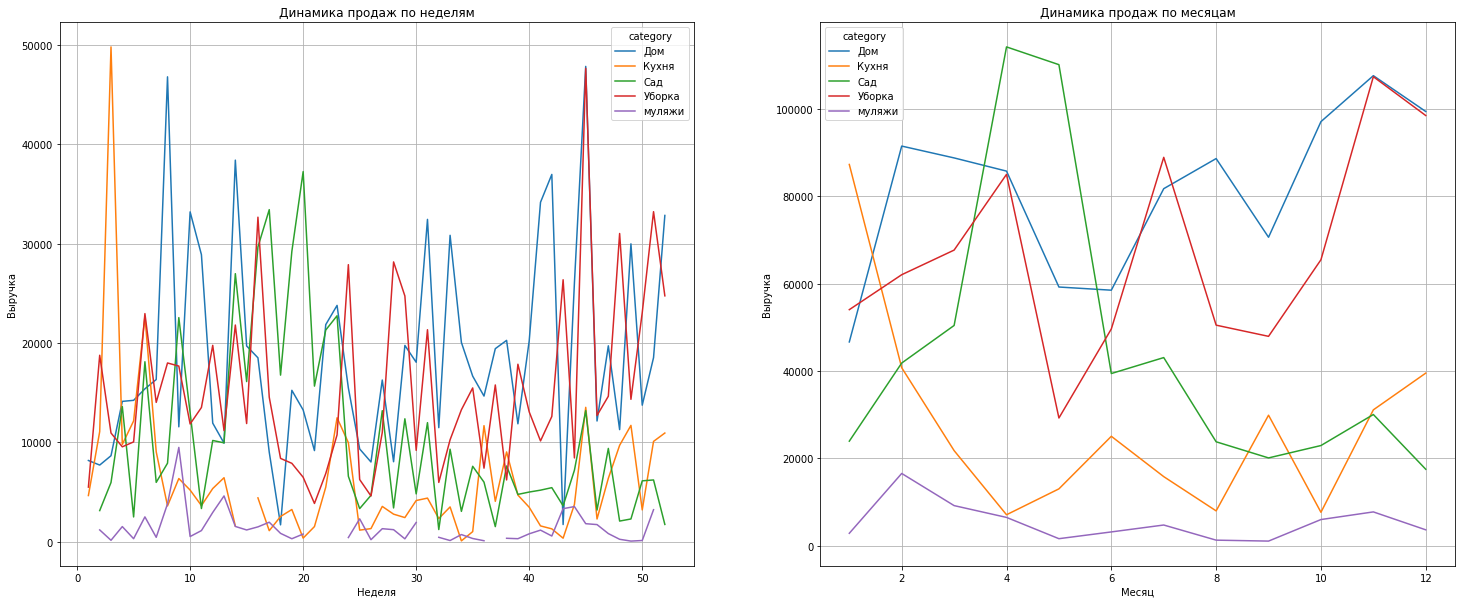

In [53]:
plt.figure(figsize=(25, 10))
 
df_new.pivot_table(index='week',
                  columns='category',
                  values='revenue',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика продаж по неделям')
plt.xlabel('Неделя')
plt.ylabel('Выручка')
 
df_new.pivot_table(index='month',
                  columns='category',
                  values='revenue',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show();

График продаж по неделям выглядит довольно скачкообразно.\
На графике продаж по месяцам мы можем отследить, что продажи различных категорий подвержены влиянию сезона.

Из наиболее отчетливых тенденций изменения выручки удалось выделить следующие тенденции:
- С января повышается спрос на товары для сада и достигает пика в июне, затем (во втором полугодии) снижается. 

Данную тенденцию можно объяснить тем, что с февраля начинается активная подготовка к дачному сезону, клиенты активно покупают семена для рассады. В апреле-мае начинает активно продаваться рассада, саженцы различных растений. продажи в "низкий сезон" могут поддерживаться горшечными растениями.

- В категории товаров для уборки были обнаружены всплески продаж в феврале-апреле, июле, ноябре.

Можно сказать, что так или иначе, товары категорий для дома и для уборки пользуются спросом на протяжении всего года.

- На товары для кухни спрос сохраняется на высоком уровне с ноября по март.

- На товары из категории "муляжи" спрос остается низким, лишь незначительно повышаясь в холодные месяцы.

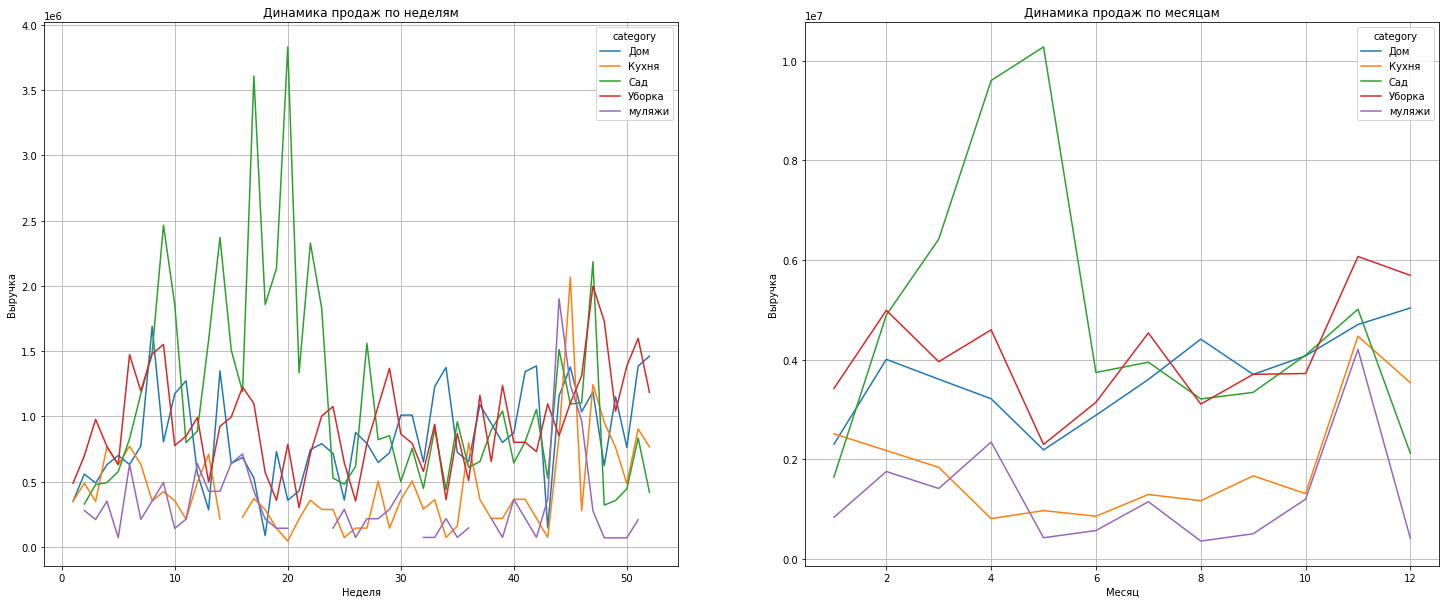

In [54]:
plt.figure(figsize=(25, 10))
 
df_new.pivot_table(index='week',
                  columns='category',
                  values='order_id',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика продаж по неделям')
plt.xlabel('Неделя')
plt.ylabel('Выручка')
 
df_new.pivot_table(index='month',
                  columns='category',
                  values='order_id',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show();

Также взглянем на количество транзакций в течение года.

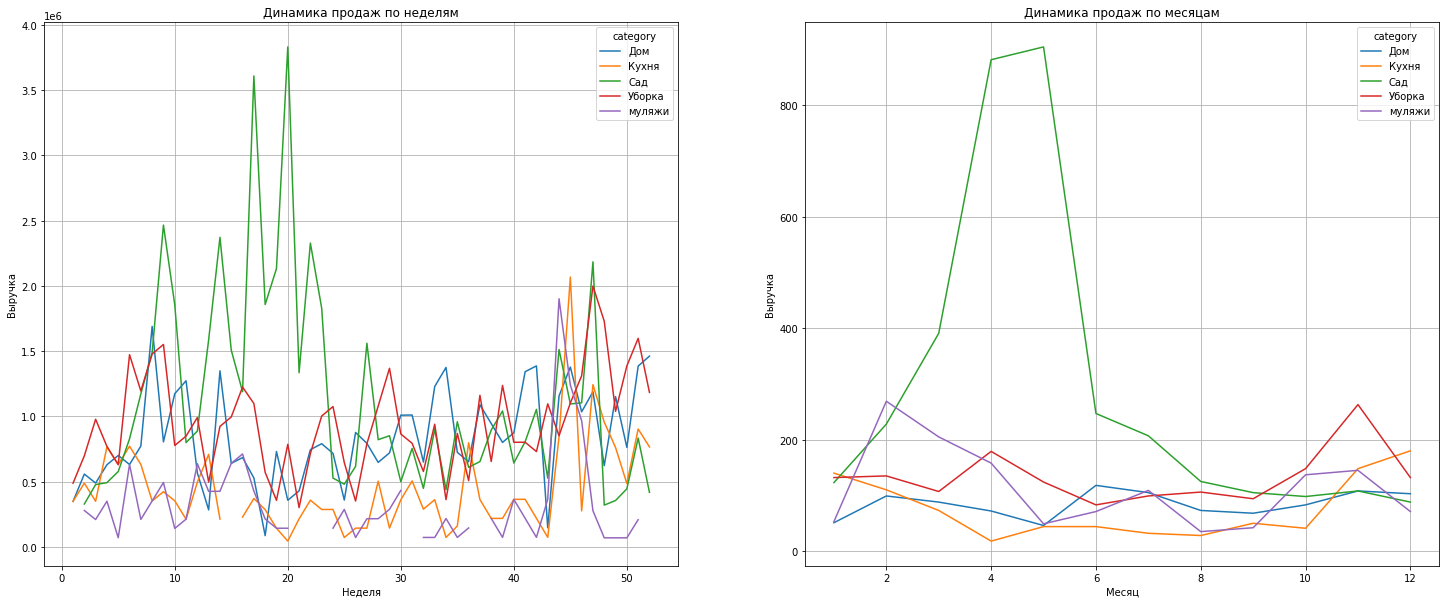

In [55]:
plt.figure(figsize=(25, 10))
 
df_new.pivot_table(index='week',
                  columns='category',
                  values='order_id',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика продаж по неделям')
plt.xlabel('Неделя')
plt.ylabel('Выручка')
 
df_new.pivot_table(index='month',
                  columns='category',
                  values='quantity',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show();

Посмотрим на годовую динамику количества заказов. Данный график лишь отчасти напоминает вышепреведенный график с выручками.
Сразу же можем заметить одну интересную закономерность:
- В течение года число заказов из категорий Дом и Уборка незначительно отличается между собой. Однако, выручка категории Дом значительно выше, следовательно, в среднем, цены на товарную позицию в категории Дом выше,не смотря на относительно одинаковый уровень продаж. Было бы неплохо увеличить среднюю стоимость одной товарной позиции в категории кухня, добавить больше дорогих товаров (например, бытовой техники). Данный подход вероятно, сможет позитивно сказаться на увеличении уровня выручки.
- Можем заметить всплеск активности в категории "Муляжи", который приходятся на октябрь - ноябрь. Муляжи используются в декоративных целей. Вероятно, всплеск числа заказов спровоцирован "осенними мероприятиями" в учебных заведениях, которые как раз проводятся в сентябре-ноябре. В декоре для таких праздников часто используют муляжи овощей и фруктов. 

Теперь рассмотрим, есть ли зависимость между продажами категорий. Для этого построим матрицу корреляций.

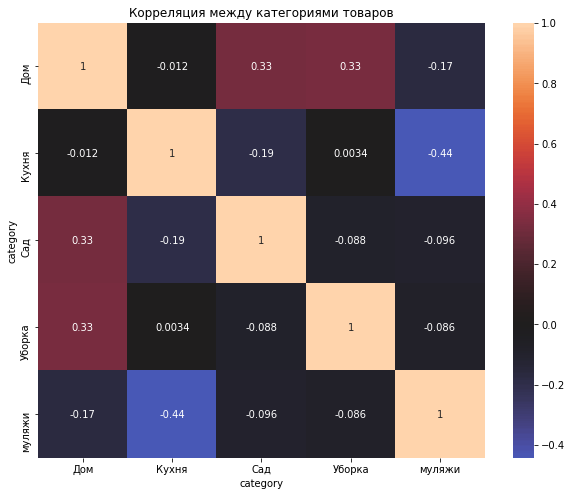

In [81]:
matrix_corr=pd.pivot_table(df, index='date', columns='category', values='quantity', aggfunc='sum')

plt.figure(figsize=(10,8))
sns.heatmap(matrix_corr.corr(), xticklabels=matrix_corr.corr().columns, yticklabels=matrix_corr.corr().columns, center=0, annot=True)

plt.title('Корреляция между категориями товаров')

plt.show()

В матрице можно заметить, что товары категорий Кухня и Муляжи имеют отрицательную корреляцию, то есть продажи одних товаров напрямую влияют на продажи других. Значит, повышение продаж товаров одной категории ведет к сокращению продаж другой, и наоборот.
Существует положительная корреляция между категориями Уборка-Дом и Уборка-Сад. Это значит, что Увеличение продаж одного товара ведет к увеличения продаж другого товара.

Следовательно, можно предлагать в рекламных плашках, уведомлениях покупателю дополнительные товары из раздела категорий, между которыми существует корреляционная связь. 


## Сегментация по профилю потребленния.


<div class="alert alert-block alert-danger">

__Комментарий от тимлида v2__
        
Ошибка сегментации клиентов до сих пор сохраняется. Как я тебе говорил выше, тебе нужно сформировать датафрейм с метриками по твоим клиентам. То есть в группировке по customer_id ты можешь посчитать числовые метрики, которые будут каким-то образом описывать каждого клиента в исходных данных.
    
Далее этот новый датафрейм ты можешь прогнать, как ты это сделала сейчас. Основная проблема, что сейчас ты брала для кластеризации выборку транзакций. В результате у тебя получаются кластеры транзакций. А нам нужны кластеры клиентов.
    
Пожалуйста, внеси необходимые корректировки в сегментацию и в часть проверки гипотез, которая идет дальше.
</div>


<div class="alert alert-info">
<b> Комментарий студента v2</b>

Спасибо. Поняла в чем моя ошибка, исправила. Надеюсь теперь эта часть сделана верно.
Жду ваших замечаний и/или комментариев к частям\
    **исследовательский анализ данных** и **выводы**
</div>

<div class="alert alert-block alert-danger">

__Комментарий от тимлида v3__
        
К сожалению, все еще неправильно. Сейчас ты посчитала метрики в группировке по order_id, то есть по заказам. В итоге у тебя получился датафрейм с метриками по заказам.

Я же тебе подсказал, что нужно считать метрики по клиентам, то есть в группировке по customer_id. Попробуй в группировке по клиентам посчитать количество уникальных заказов, суммарную выручку по revenue, суммарное купленное количество товаров, среднюю стоимость приобретаемого товара. Ниже под ячейкой я указал пример кода, как можно считать метрики по клиентам.
    
Далее этот новый датафрейм ты можешь прогнать, как ты это сделала сейчас, получить кластеры клиентов и проинтерпретировать их.
    
Пожалуйста, внеси необходимые корректировки в сегментацию и в часть проверки гипотез, которая идет дальше.
</div>


<div class="alert alert-info">
<b> Комментарий студента v3</b>

Прошу прощения. Согласна, очень глупая ошибка) 
Постаралась все исправить.

</div>

In [57]:
# пример кода от наставника - подсчет по каждому клиенту количества совершенных заказов и количества купленного уникального товара
#df.groupby('customer_id').agg({'order_id' : 'nunique', 'product' : 'nunique'}).reset_index().head()

### Кластеризация пользователей

Определим профили потребления клиентов. Разделим их на кластеры.

In [58]:
cluster_data = df.groupby('customer_id').agg({'order_id':'nunique', 'quantity':'sum', 'price':'mean', 'revenue':'sum'})
#cluster_data['avg_bill'] = round(cluster_data['revenue']/cluster_data['order_id'],2)

cluster_data

order_id  quantity         price  \
customer_id                                                              
000d6849-084e-4d9f-ac03-37174eaf60c4         1         4    138.750000   
001cee7f-0b29-4716-b202-0042213ab038         1         1    442.000000   
00299f34-5385-4d13-9aea-c80b81658e1b         1         2    457.000000   
002d4d3a-4a59-406b-86ec-c3314357e498         1         1   1649.000000   
003bbd39-0000-41ff-b7f9-2ddaec152037         1         2   1162.000000   
004d24e9-4a6c-4d0e-8727-8391dfd4b43a         1        12    128.000000   
005ba170-45e8-42de-93f7-192481ae2659         1         1   1199.000000   
00bd74b1-2792-47db-a2f1-680a09ac5026         1         1    937.000000   
00c0f92a-121a-4883-a78d-2c7b5fe187de         1         1    134.000000   
00cd704a-a65c-4865-b39a-779f1b4f1d1a         1         1    112.000000   
00e59a12-06d5-47fc-9a33-bfc53aca1e9f         1         2    899.000000   
00ff5327-0fba-481c-8a07-47a95093a213         1         1   1049.000000   
0114e87e-78e2-49bf-9c8c-bbddd7191a3f         1         1    974.000000   
0131d2f9-e553-4cb6-ac85-f96e9cb7cb47         1         1   1574.000000   
0161a155-59b3-4613-a6ff-2e6bfcc00463         1         1   2699.000000   
01626eda-0717-4a39-826e-1982a358576d         1         1    599.000000   
0184f535-b60a-4914-a982-231e3f615206         4        43    107.600000   
018dc738-2846-464d-a421-126a8ed64bc5         1        10     94.000000   
019ddfb4-f9fe-4b17-88bb-0ec9edb56479         1         1   2549.000000   
01a53da1-c3ae-47cf-916e-7e345fe2f2bc         1         1   2924.000000   
01bd5b9a-2b4e-483c-95a3-40b040c392e8         1         8     52.857143   
01c31cf3-cdb3-4b90-a2ef-ebe1b9e1fc33         1         3   1696.666667   
01ca3206-da26-470d-8240-f34e7086c214         1         1    157.000000   
01f95d43-4a8d-45e5-9c23-cccd211e6d30         1         1     44.000000   
022ecd2e-bc6c-4e78-938e-b9e4bc526271         1        10    118.857143   
02477bed-bad4-482f-9e47-80d7f6d77c7b         1         1    524.000000   
02648fcc-ab94-4f94-ad3b-fbaef270d001         1         1   1912.000000   
0279a2cc-6bd4-4004-bc6c-cf43ec9bdeee         1         1    157.000000   
028469c0-9e87-4596-ac2e-c5b1d48ea9b6         1        30     26.000000   
02a27adc-a1fe-4aaf-9945-1ab779979537         1         1     45.000000   
02adb72a-3067-45e9-a3b5-f93d79d7496a         2         2   5361.500000   
02cb74c5-348f-43dc-ba4d-e546a21a07f1         1         1    134.000000   
030c91b7-311d-407e-a3ac-e64c03537569         1         1    150.000000   
03134fa3-9ce0-4973-849d-32c21e26d64e         1         1   1177.000000   
03427797-398e-497d-a303-48879e7ba7f7         1         1    525.000000   
034ed71f-ad8c-4891-848b-297a64c9ec22         1         2    329.000000   
036118cf-c198-48fa-ba15-6d841482a56d         2        18    112.000000   
036d75ea-b633-41a8-8974-3f84fee8c65e         1         1   2399.000000   
036edc2c-d0ad-4c71-99f6-226db1b883f4         1         2    239.000000   
03865a43-8c19-4d4e-ab51-7ec516614a83         1         2    135.000000   
03b7b4a5-9e2c-42f9-a131-96f3d2772f17         1         1   1574.000000   
03bdfd0d-218d-4572-b623-36baa274a9ea         1         1   4874.000000   
03d875f5-1100-45be-9979-6269a8573c00         1         1   1049.000000   
04416514-5346-4f90-93e3-fb7365e2ee8c         1         1     30.000000   
04c9031f-1248-4fd9-add0-6c5a4efaa58e         1         1    599.000000   
04d4b824-7b31-4262-8aa0-e43772602521         1         1    734.000000   
04f4acb1-8c6d-4e1c-a960-3fa400d220a7         1         1   1874.000000   
051d78d4-3667-4018-90d5-2e7ae8c98816         1         1    727.000000   
051edfd2-b09e-4e48-b12d-cf6ab2fdcc5f         1        15     37.000000   
05257dd3-0c7e-4b4c-a86d-786558162d11         1         1   3599.000000   
052616d4-286c-4ae0-87ec-6d7f1c41f56f         1         2    712.000000   
052b23ea-1a8c-4498-b52f-9c4a94a510cd         1         1   1424.000000   
05304729-78e7-4168-b6be-b58423913247      

In [59]:
# Стандартизируем данные. Создим объект класса Scaler.
sc = StandardScaler()
#обучим scaler 
df_sc = sc.fit_transform(cluster_data)

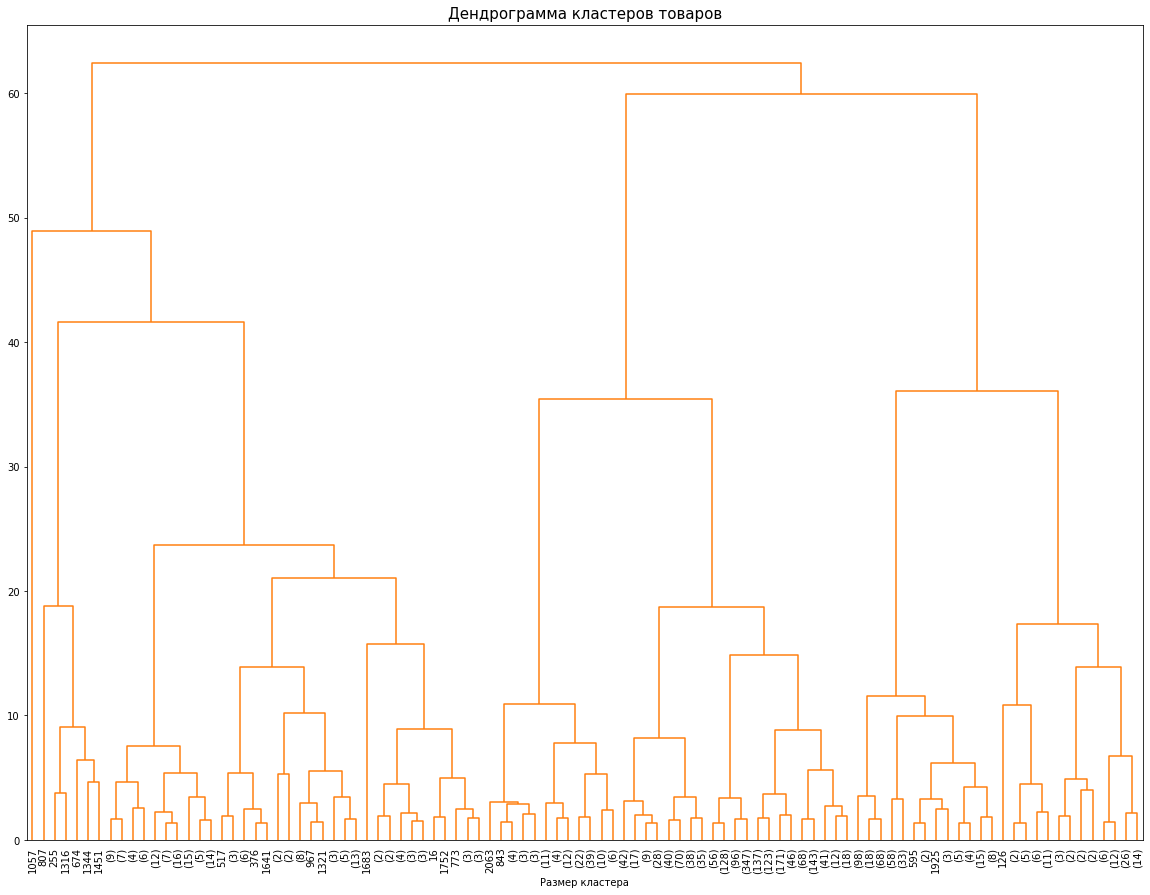

In [60]:
# Расчитаем матрицу расстояний:
linked = linkage(df_sc, method='ward')

# Построим график дендрограмму.
plt.figure(figsize=(20, 15))
plt.title('Дендрограмма кластеров товаров', fontsize=15)
dendrogram(linked, orientation='top', leaf_rotation=90, leaf_font_size = 10, truncate_mode='lastp', p=100, color_threshold=70)
plt.xlabel("Размер кластера")
plt.show()

На основании данных дендрограммы принимаем решение выделить 2 кластера

In [61]:
# Обучим модель кластеризации на основании алгоритма K-Means:
model_km = KMeans(n_clusters = 2, random_state = 0)
labels = model_km.fit_predict(df_sc)

In [62]:
# Добавим столбец с номером кластера в наш датасет:
cluster_data['cluster'] = labels

### Статистика по сегментам покупателей

In [63]:
display(round(cluster_data.groupby(['cluster']).mean(),2).T)

cluster        0        1
order_id    1.08     1.17
quantity    3.99     2.48
price     500.83  3696.30
revenue   873.03  5183.54

**Вывод:**
- Разбили всех пользователей на два кластера при помощи алгоритма K-means.
- Выявили различия между кластерами, и теперь можем охарактеризовать их более точно и подробно:

Кластер 0:
- Среднее количество заказов = 1,08
- Среднее количество заказанных товрных позиций на одного пользователя = 3,99
- Средняя цена приобретаемого товара = 500,83
- Средняя суммарная выручка = 1012.63
----------
Кластер 1:

- Среднее количество заказов = 1.17
- Среднее количество заказанных товрных позиций на одного пользователя = 2,98
- Средняя цена приобретаемого товара = 3696,30
- Средняя суммарная выручка = 5183,54
----------
Следовательно, выделили два сегмента пользователей:

Пользователи кластера 0: Заказывают большее количество дешевых товаров, выручка от них меньше
**Покупают больше дешевых товаров**

Пользователи кластера 1: Заказывают товаров меньше, но средняя цена одного товара более, чем в 7 раз превышает среднюю стоимость единицы товаров, по сравнению с клиентами кластера 0. Вносят наибольший вклад в прибыль компании.
**Покупают меньше дорогих товаров**

## Проверка статистических гипотез


Проверим гипотезы о наличии различий (или об их отсутствии) между различными сегментами по средней выручке.
Подтвердим значимость различий выделенных групп друг от друга по различным метрикам.

### Гипотеза 1
H0: Средняя выручка от покупателей кластеров 0 и 1 одинаковая.

H1: Средняя выручка от покупателей кластеров 0 и 1 различается.

In [64]:
cl_rev_0 = cluster_data[cluster_data['cluster']==0]['revenue']
cl_rev_1 = cluster_data[cluster_data['cluster']==1]['revenue']


In [65]:
# Дисперсия средней выручки кластера 0
pvariance(cl_rev_0)

765843.7249308972

In [66]:
# Дисперсия средней выручки кластера 1
pvariance(cl_rev_1)

25620770.574071106

In [67]:
alpha = 0.05 

results = st.ttest_ind(cl_rev_0, cl_rev_1, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  2.0813683905276388e-26
Отвергаем нулевую гипотезу: между выборками есть значимая разница


По результатами статистического теста нулевая гипотеза была отвергнута, что означает:\
**Средняя выручка от покупателей кластера 0 различается от средней выручки покупателей кластера 1**

### Гипотеза 2

Н0: Количество транзакций товаров от покупателей кластера 0 и кластера 1 не различается.

Н1: Количество транзакций товаров от покупателей кластера 0 и кластера 1 различается.

In [68]:
cl_quantity_0 = cluster_data[cluster_data['cluster']==0]['quantity']
cl_quantity_1 = cluster_data[cluster_data['cluster']==1]['quantity']

In [69]:
# Дисперсия количества транзакций кластера 0 
pvariance(cl_quantity_0)

51.46147629863485

In [70]:
# Дисперсия количества транзакций кластера 1 
pvariance(cl_quantity_1)

41.38829239257343

In [71]:
alpha = 0.05 

results = st.ttest_ind(cl_quantity_0, cl_quantity_1, equal_var=True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  0.0034600233215716296
Отвергаем нулевую гипотезу: между выборками есть значимая разница


**Количество транзакций товаров от покупателей кластера 0 и кластера 1 различается.**

### Гипотеза 3

Н0: Количество заказов покупателей кластера 0 и кластера 1 не различается.

Н1: Количество заказов покупателей покупателей кластера 0 и кластера 1 различается.

In [72]:
cl_order0 = cluster_data[cluster_data['cluster']==0]['order_id']
cl_order1 = cluster_data[cluster_data['cluster']==1]['order_id']

In [73]:
# Дисперсия количества заказов кластера 0 
pvariance(cl_order0)

0.11144676418977173

In [74]:
# Дисперсия количества заказов кластера 1 
pvariance(cl_order1)

1.3164533778988576

In [75]:
alpha = 0.05 

results = st.ttest_ind(cl_order0, cl_order1, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  0.2670328967531841
Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными


**Количество заказов покупателей кластера 0 и кластера 1 не различается.**

## Выводы:


В данном проекте мы исследовали товарный ассортимент и поведение пользователей интернет-магазина товаров для дома и быта «Пока все ещё тут» за период с 2018-11-01 08:00:00 по: 2019-10-31 23:00:00.
В ходе исследования данных была проведена **предобработка данных**, в ходе которой:
- Был выбран наиболее показательный период для анализа (в котором данные представлены наиболее полно)
- Были удалены аномальные значения
- Изменен тип данныз столбца "date"

Далее, перед нами стояла задача разбить товарный ассортимент не более, чем на 5 категорий.\
Мы выделили следующие категории:
- Сад
- Кухня
- Уборка
- Дом
- Муляжи
Больше всего наименований товарных позиций оказалось в категории "Сад", меньше всего в категории "Муляжи".

**В исследовательском анализе данных:**
Были исследованы показатели пользователькой активности в зависимости от категории предпочитаемых товаров:
- Количество уникальных пользователей(customer_id): 2428
----------
- Количество уникальных заказов(order_id): 2564
----------
- На каждого пользователя приходится заказов: 1.09
----------
- Всего за исследуемый период было продано товаров на сумму: 2961242.0
----------
- Средний чек заказа:  1154
----------
- В среднем, каждый покупатель потратил: 1254
----------

- Больше всего выручки приносят покупатели, предпочитающие категории: Дом, Уборка, Кухня; Меньше всего: Сад и Муляжи.
- Лидирует по количеству товарных наименований категории Сад, меньше всего товарного разнообразия в категории "Муляжи".
- Сезонный аспект:
Сад - Спрос растет с февраля по июнь(достигает пика), затем снижается.
Уборка- всплески продаж в феврале-апреле, июле, ноябре.
Можно сказать, что так или иначе, товары категорий для дома и для уборки пользуются спросом на протяжении всего года.
Кухня - спрос сохраняется на высоком уровне с ноября по март.
В течение года число заказов из категорий Дом и Уборка незначительно отличается между собой. 
В течение года выручка из категорий Дом и Уборка значительно различается.


**В разделе "Сегментация по профилю потребления":**
Сформировали обучающую выборку с метриками по клиентам (customer_id). Разделили пользователей на  2 кластера,
\ воспользовавшись алгоритмом K-Means.
Выявили различия между сегментами покупателей.
Кратко охарактеризовали по основным метрикам каждый сегмент потребления:
----------

Кластер 0:
- Среднее количество заказов = 1,08
- Среднее количество заказанных товрных позиций на одного пользователя = 3,99
- Средняя цена приобретаемого товара = 500,83
- Средняя суммарная выручка = 1012.63
----------
Кластер 1:

- Среднее количество заказов = 1.17
- Среднее количество заказанных товрных позиций на одного пользователя = 2,98
- Средняя цена приобретаемого товара = 3696,30
- Средняя суммарная выручка = 5183,54
----------
Следовательно, выделили два сегмента пользователей:

Пользователи кластера 0: **Покупают больше дешевых товаров**

Пользователи кластера 1: **Покупают меньше дорогих товаров***

----------
В разделе **Проверка статистических гипотез:**
- В проверке гипотезы о равенстве средних выручек от покупателей кластеров\
отвергли нулевую гипотезу в пользу альтернативной, и сделали вывод:

**Средняя выручка от покупателей кластера 0 различается от средней выручки покупателей кластера 1**

- В проверке гипотезы о равенстве количества транзакций товаров от покупателей различных кластеров \
отвергли нулевую гипотезу в пользу альтернативной, и сделали вывод:

**Количество транзакций товаров от покупателей кластера 0 и кластера 1 различается.**

- В проверке гипотезы о равенстве количества заказов покупателей различных кластеров \
не смогли отвергнуть нулевую гипотезу в пользу альтернативной, и сделали вывод:

**Количество заказов покупателей кластера 0 и кластера 1 не различается.**

## Рекомендации:



- Можно предлагать в рекламных плашках или уведомлениях покупателю дополнительные товары из раздела категорий, между которыми существует корреляционная связь: Уборка-Дом, Уборка-Кухня, Дом-Сад. Создавать маркетинговые предложения, которые затрагивают одновременно несколько категорий. Это может увеличить число товаров за одну покупку.

- Постараться свести на минимум категорию "Муляжи", или избавиться от нее со временем вовсе т.к. в этой категории достаточно низкие продажи, стабильно низкий спрос. Данная категория подвержена сезонному влиянию, товары данной группы незначительно повышались с сентября по ноябрь. Цена за еденицу товара, в среднем, также достаточно низкая.

- Падение спроса в категории "Сад" в холодное время года можно снизить за счет продажи домашних, горшечных вариантов цветов, а также (возможно) за счет дополнения ассортимента литературными, справочными материалами о садоводстве.

- Также, проблем данной категории: низкий чек при высоких продажах. Стоит дополнить ассортимент более дорогими товарами(теми же семенами из более дорогих вариантов, удобрениями, всеми сопутствующими приспособлениями для выращивания рассады). Пользователи готовы приходить и покупать товары из данной категории. 

- В течение года число заказов из категорий Дом и Уборка незначительно отличается между собой. Однако, выручка категории Дом значительно выше, следовательно, в среднем, цены на товарную позицию в категории Дом выше,не смотря на относительно одинаковый уровень продаж. Было бы неплохо увеличить среднюю стоимость одной товарной позиции в категории кухня, добавить больше дорогих товаров (например, бытовой техники). Данный подход вероятно, сможет позитивно сказаться на увеличении уровня выручки.

- Необходимо подумать над увеличением числа заказов на одного клиента. Сейчас этот показатель = 1.09, это очень мало, и означает, что чаще всего один пользователь заказывает в нашем магазине только один раз, редко кто возвращается снова. Можно ввести промокоды на повторную покупку.

Рекомендации по Кластерам:
- Прежде всего необходимо собрать клиентскую базу, чтобы взаимодействовать с потребителем.
- Ввести промо-акции, рекомендательные e-mail и смс рассылки со специальными предложениями, ввести карты лояльности. 

Кластер 0 - **Покупают больше дешевых товаров**\
Главная задача - необходимо повысить средний чек и среднюю сумму покупаемого товара.
Что можно сделать:
- Расширить ассортимент, ввести более дорогие и качественные товары лучшего качества.
- Проанализировать потребности покупателей, возможно расширить ассортимент, добавить более актуальные категории.
- Ввести промоакции: скидки\подарки начиная от определенной суммы покупки.

Кластер 1 - **Покупают меньше дорогих товаров**\
Главная задача - необходимо увеличить количество товарных наименований в чеке.

- Ввести бонусную программу (например, карты с накопительными скидками и статусами для постоянных пользователей)
- Предлагать при оформлении заказа докупить разнообразный сопутствующий дополнительный товар, различные мелочи.
- специальные предложения на следующую покупку

## Презентация к проекту

Ссылка: https://disk.yandex.ru/i/6Mml0eFd3iuotg